In [1]:
import torch
from torch import nn
from importlib import reload
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import albumentations
from albumentations import augmentations
import albumentations.pytorch

In [8]:
def feat_pool(feat: torch.tensor, operation: str):
    """
    Fuses the image's patches feature representation
    :param feat: The network object
    :param operation: Either max or mean for the pooling operation
    :returns: The final 256-D feature representation of the entire image
    """
    if operation == "max":
        return feat.max(axis=0)
    elif operation == "mean":
        return feat.mean(axis=0)
    else:
        raise Exception("The operation can be either mean or max")

In [4]:
df = pd.read_csv('all_features.csv')
train_df = df[~df["fold"].isin([1])]
test_df = df[df["fold"].isin([1])]

In [24]:
trainX = []
trainY = []
testX = []
testY = []

In [25]:
for row in tqdm(train_df.values):
    _, label, _, _, _, feature = row

    feature_array = torch.load(feature)
    condensed_feature = feat_pool(feature_array, "mean").numpy().reshape(1, -1)
    trainX.append(condensed_feature)
    trainY.append(label)

for row in tqdm(test_df.values):
    _, label, _, _, _, feature = row

    feature_array = torch.load(feature)
    condensed_feature = feat_pool(feature_array, "mean").numpy().reshape(1, -1)
    testX.append(condensed_feature)
    testY.append(label)

100%|██████████| 2412/2412 [00:01<00:00, 2065.20it/s]


In [26]:
XTrain = np.vstack(trainX)
YTrain = np.array(trainY)
print(XTrain.shape, YTrain.shape)

XTest = np.vstack(testX)
YTest = np.array(testY)
print(XTest.shape, YTest.shape)

(21096, 256) (21096,)
(2412, 256) (2412,)


In [44]:
import SVM
reload(SVM)

hyper_params = [{
    'kernel': ['rbf', 'poly', 'sgmoid'], 
    'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 'scale', 'auto'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 3000, 5000, 10000, 30000, 50000, 100000]
}]

opt_params = SVM.optimize_hyperparams(XTrain, YTrain, params=hyper_params)
# Optimal hyper-parameters:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
#Optimal hyper-parameters:  {'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}

Fitting 10 folds for each of 312 candidates, totalling 3120 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed: 62.3min
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed

In [41]:
import SVM
reload(SVM)

print(opt_params)
SVM.classify(XTrain, YTrain, opt_params)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   59.3s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   59.8s remaining:   59.8s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.0min remaining:   26.1s
[0.91516588 0.93459716 0.93175355 0.92748815 0.92511848 0.88862559
 0.92982456 0.96111901 0.95495495 0.78757705]
0.9156224396009879
0.04668465253233848
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [42]:
import SVM
reload(SVM)

params2 = {
    'C' : 10000,
    'gamma' : 'scale',
    'kernel' : 'rbf'
}
SVM.classify(XTrain, YTrain, params2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  2.9min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  3.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.2min remaining:  1.4min
[0.91137441 0.92654028 0.93033175 0.93127962 0.92606635 0.86824645
 0.9544808  0.97771456 0.97771456 0.82503556]
0.922878433434682
0.04455629956450695
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished


In [45]:
import SVM
reload(SVM)

params3 = {'C': 10000, 'gamma': 0.1, 'kernel': 'rbf'}
SVM.classify(XTrain, YTrain, params3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  1.2min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.3min remaining:   32.4s
[0.90995261 0.92606635 0.93080569 0.93080569 0.92559242 0.86919431
 0.95590327 0.97913703 0.97866287 0.83072546]
0.9236845700776855
0.04364117107898635
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


Test Accuracy: 0.9067164179104478
True negatives:  1245 False positives:  108 False negatives:  117 True positives:  942


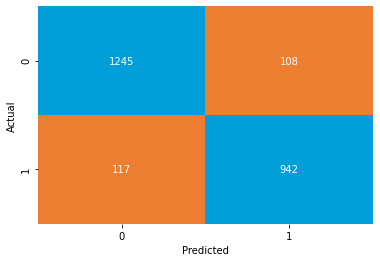

In [46]:
import SVM
reload(SVM)

SVM.print_confusion_matrix(XTrain, YTrain, XTest, YTest, params3)